In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df=pd.read_csv('Airbnb.csv')
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_18308\1267534449.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Airbnb.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

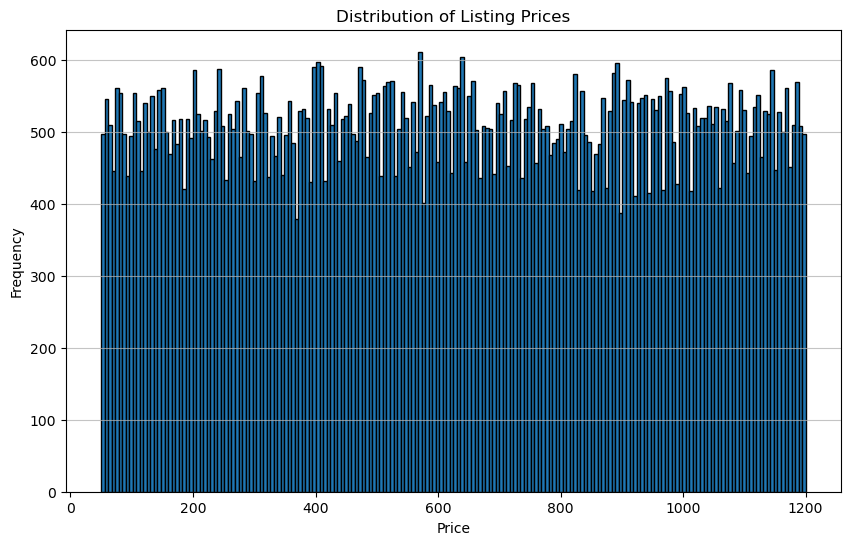

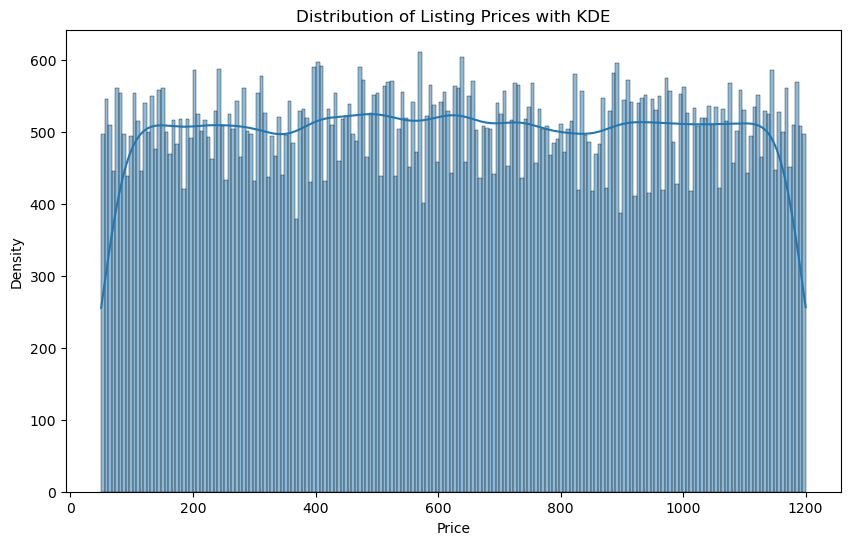

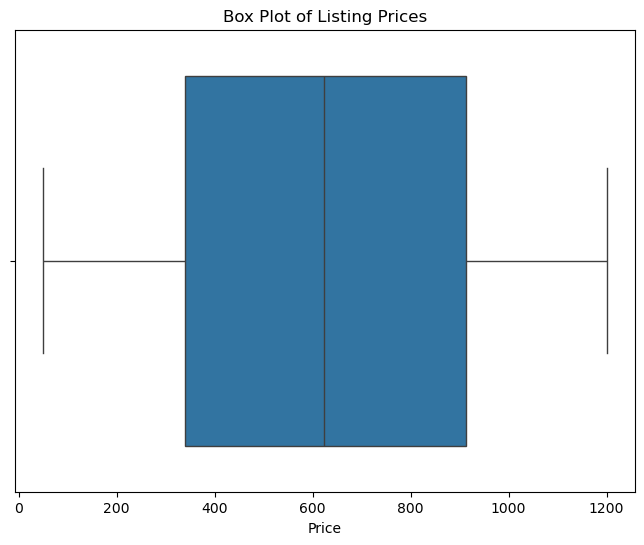


Descriptive Statistics of Listing Prices:
count    102352.000000
mean        625.293536
std         331.671614
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Convert 'price' column to string first
df['price'] = df['price'].astype(str)

# Remove '$' and ',' from the 'price' column
df['price'] = df['price'].str.replace(r'[$,]', '', regex=True)

# Replace any remaining 'nan' strings with actual np.nan values
df['price'] = df['price'].replace('nan', np.nan)

# Now convert the 'price' column to numeric, coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where 'price' is NaN after conversion
df.dropna(subset=['price'], inplace=True)

# Now you can proceed with the visualization

# 1. Histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=200, edgecolor='black')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Histogram and KDE using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=200, kde=True)
plt.title('Distribution of Listing Prices with KDE')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# 3. Box Plot using Seaborn to identify outliers and spread
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Listing Prices')
plt.xlabel('Price')
plt.show()

# 4. Descriptive Statistics using Pandas
print("\nDescriptive Statistics of Listing Prices:")
print(df['price'].describe())

Distribution of Room Types:
 | Room Type       | Count   |
|:----------------|:--------|
| Entire home/apt | 53568   |
| Private room    | 46450   |
| Shared room     | 2218    |
| Hotel room      | 116     |


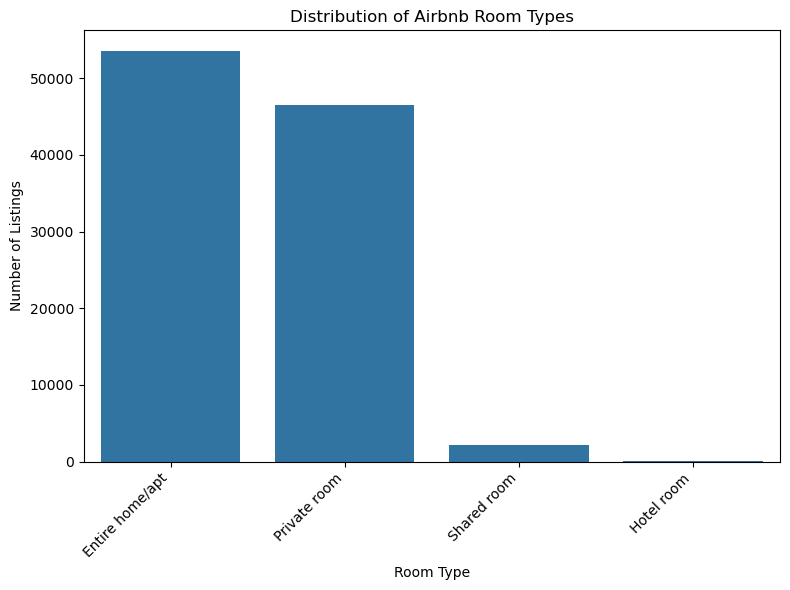

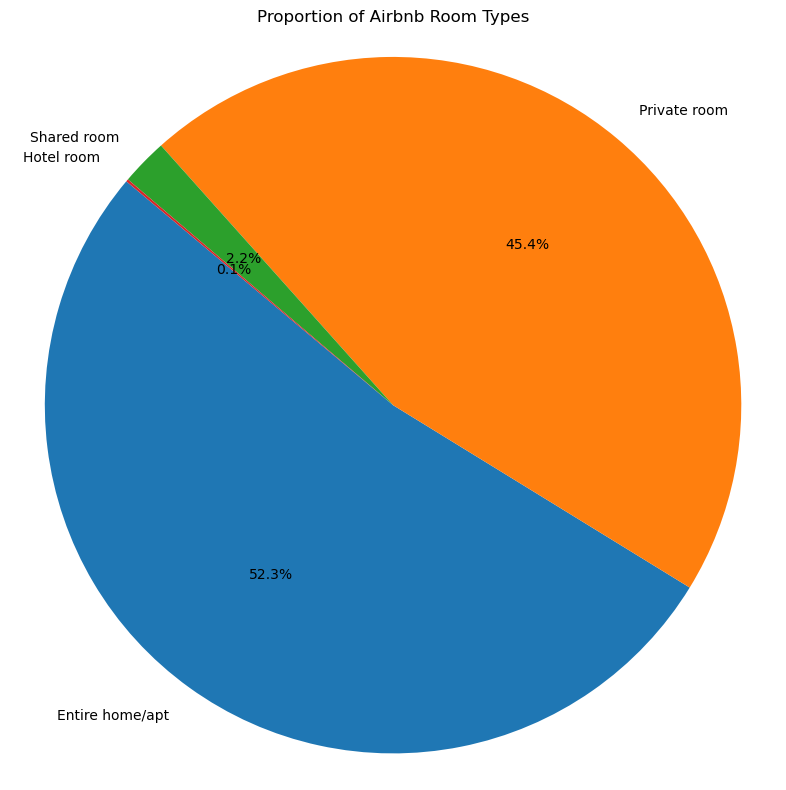

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Get the value counts of the 'room type' column
room_type_counts = df['room type'].value_counts()

# Convert the Series to a DataFrame for easier plotting with Seaborn
room_type_df = pd.DataFrame({'Room Type': room_type_counts.index, 'Count': room_type_counts.values})

# Print the counts of each room type
print("Distribution of Room Types:\n", room_type_df.to_markdown(index=False, numalign="left", stralign="left"))

# Create a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Room Type', y='Count', data=room_type_df)
plt.title('Distribution of Airbnb Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Airbnb Room Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# Checking Missing Values

In [28]:
df.isnull().sum()

id                                     0
NAME                                 247
host id                                0
host_identity_verified               285
host name                            401
neighbourhood group                   28
neighbourhood                         15
lat                                    8
long                                   8
country                              527
country code                         126
instant_bookable                     100
cancellation_policy                   71
room type                              0
Construction year                    210
price                                  0
service fee                          239
minimum nights                       409
number of reviews                    183
last review                        15867
reviews per month                  15852
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

# Handling missing values

In [39]:
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102352 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102352 non-null  int64         
 1   NAME                            102105 non-null  object        
 2   host id                         102352 non-null  int64         
 3   host_identity_verified          102067 non-null  object        
 4   host name                       101951 non-null  object        
 5   neighbourhood group             102324 non-null  object        
 6   neighbourhood                   102337 non-null  object        
 7   lat                             102344 non-null  float64       
 8   long                            102344 non-null  float64       
 9   country                         101825 non-null  object        
 10  country code                    102226 non-null  object      

In [49]:
df.fillna(({'reviews per month': 0, 'last review': df['last review'].min()}), inplace=True)

In [45]:
df.dropna(subset=['NAME', 'host name'], inplace=True)

In [55]:
df.isnull().sum()

id                                     0
NAME                                   0
host id                                0
host_identity_verified               272
host name                              0
neighbourhood group                   25
neighbourhood                         15
lat                                    8
long                                   8
country                              521
country code                         117
instant_bookable                      91
cancellation_policy                   65
room type                              0
Construction year                    196
price                                  0
service fee                          239
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [59]:
df = df.drop(columns=['license','license'], errors='ignore')

In [65]:
df['price'] = df['price'].replace({'\$': '',}, regex=True).astype(float)
df['service fee'] = df['service fee'].replace({'\$': '',}, regex=True).astype(float)

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\DELL\AppData\Local\Temp\ipykernel_18308\37688407.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$': '',}, regex=True).astype(float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18308\37688407.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace({'\$': '',}, regex=True).astype(float)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."


# Remove Duplicates

In [74]:
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101171 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101171 non-null  int64         
 1   NAME                            101171 non-null  object        
 2   host id                         101171 non-null  int64         
 3   host_identity_verified          100899 non-null  object        
 4   host name                       101171 non-null  object        
 5   neighbourhood group             101146 non-null  object        
 6   neighbourhood                   101156 non-null  object        
 7   lat                             101163 non-null  float64       
 8   long                            101163 non-null  float64       
 9   country                         100650 non-null  object        
 10  country code                    101054 non-null  object      

# descriptive statistics

In [77]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.011710e+05,1.011710e+05,101163.000000,101163.000000,100975.000000,101171.000000,100932.000000,100777.000000,100989.000000,101171,101171.000000,100864.000000,100853.000000,100751.000000
mean,2.921839e+07,4.925206e+10,40.728079,-73.949664,2012.486328,625.381008,125.055671,8.102900,27.516967,2018-05-15 09:53:24.099989248,1.163980,3.278633,7.938485,141.141825
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.509576e+07,2.458341e+10,40.688720,-73.982560,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.923712e+07,4.910886e+10,40.722290,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-22 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.329896e+07,7.398283e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626729e+07,2.853668e+10,0.055862,0.049476,5.764676,331.609111,66.320823,30.379291,49.561048,NaN,1.684694,1.285208,32.320392,135.408973


# Visualization

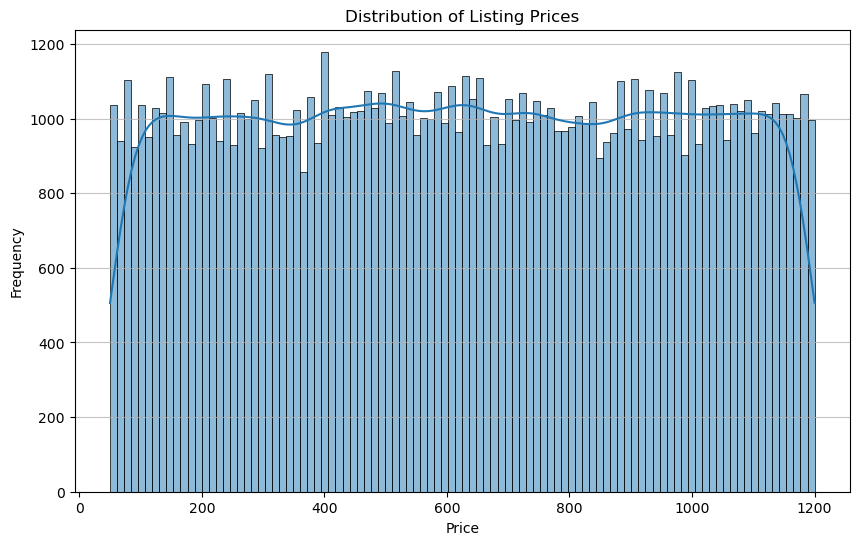

In [92]:
# 1. Histogram using Matplotlib
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100,kde=True,edgecolor='black')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

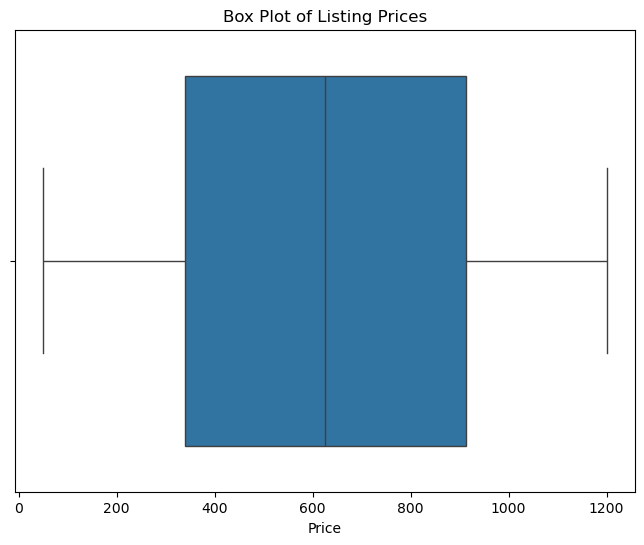


Descriptive Statistics of Listing Prices:
count    101171.000000
mean        625.381008
std         331.609111
min          50.000000
25%         340.000000
50%         625.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64


In [94]:
# 3. Box Plot using Seaborn to identify outliers and spread
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Listing Prices')
plt.xlabel('Price')
plt.show()

# 4. Descriptive Statistics using Pandas
print("\nDescriptive Statistics of Listing Prices:")
print(df['price'].describe())

# Conclusion: add here

In [97]:
df['room type']

0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 101171, dtype: object

([0, 1, 2, 3],
 [Text(0, 0, 'Private room'),
  Text(1, 0, 'Entire home/apt'),
  Text(2, 0, 'Shared room'),
  Text(3, 0, 'Hotel room')])

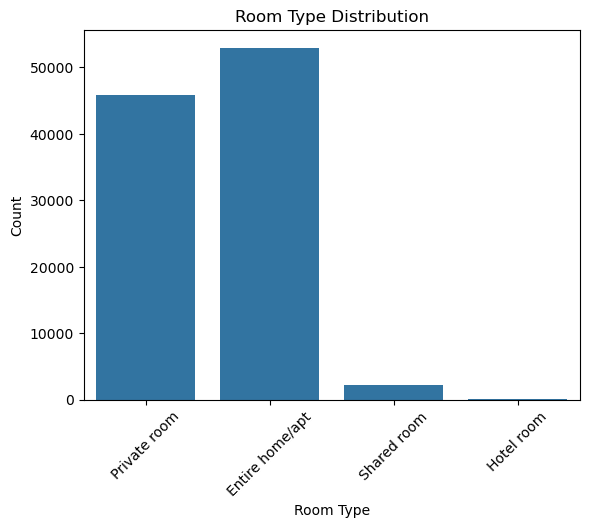

In [101]:
sns.countplot(x="room type", data=df)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=45)

In [ ]:
Conclusion: People book entire home/ apt

In [106]:
df['neighbourhood group']

0          Brooklyn
1         Manhattan
2         Manhattan
4         Manhattan
5         Manhattan
            ...    
102053     Brooklyn
102054     Brooklyn
102055     Brooklyn
102056    Manhattan
102057    Manhattan
Name: neighbourhood group, Length: 101171, dtype: object

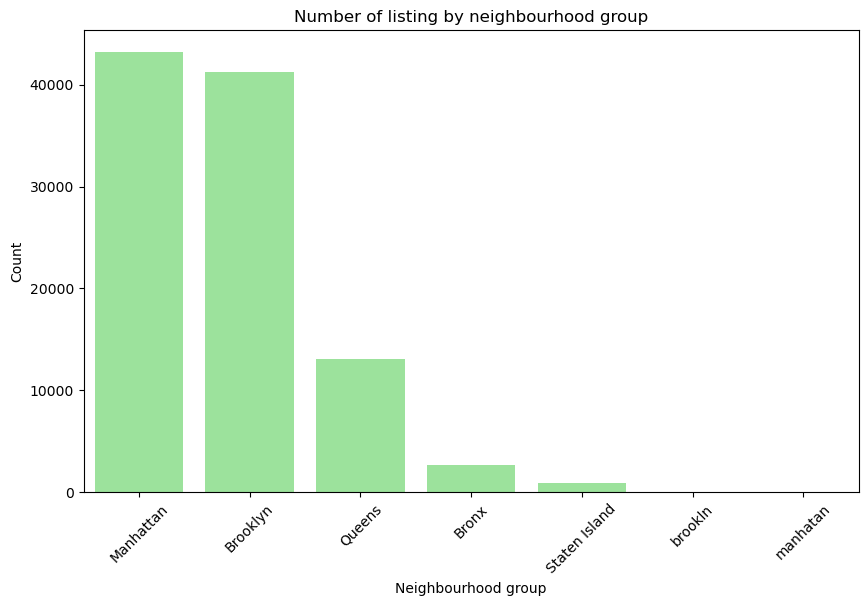

In [118]:
plt.figure(figsize=(10, 6))
sns.countplot(x="neighbourhood group", data=df, color='lightgreen', order=df['neighbourhood group'].value_counts().index)
plt.title('Number of listing by neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

In [ ]:
Price vs room type

C:\Users\DELL\AppData\Local\Temp\ipykernel_18308\2849274479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room type', y='price', data=df, palette='viridis')


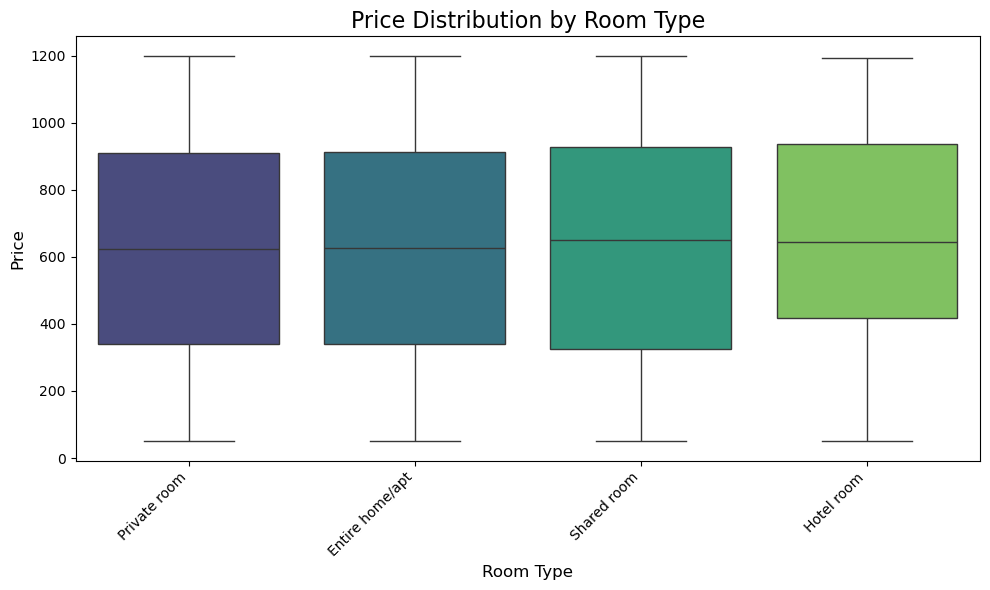

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18308\3129551104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='room type', y='price', data=df, palette='viridis')


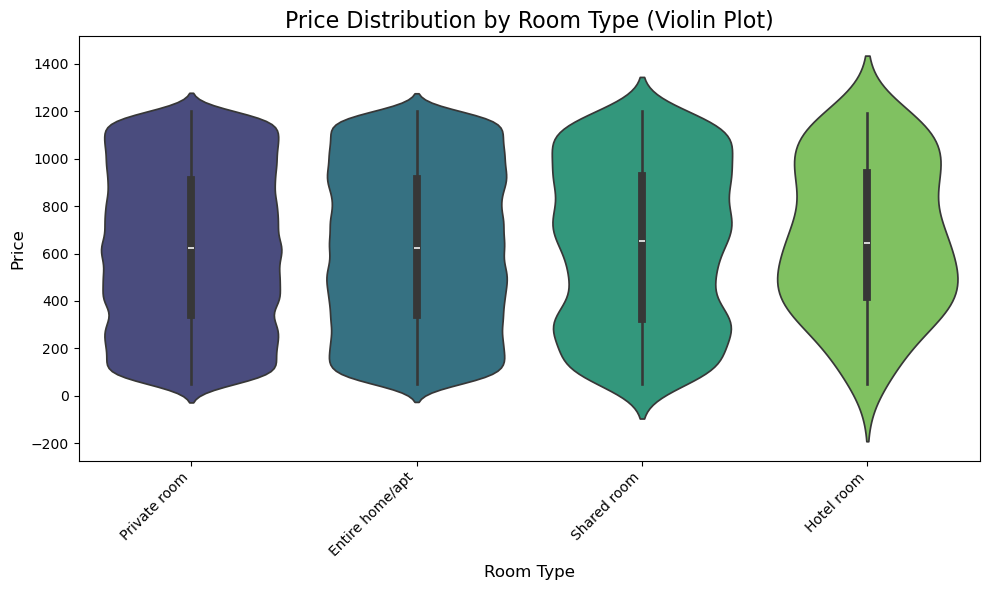

In [128]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='room type', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Room Type (Violin Plot)', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# How has the number of reviws changed over time

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101171 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101171 non-null  int64         
 1   NAME                            101171 non-null  object        
 2   host id                         101171 non-null  int64         
 3   host_identity_verified          100899 non-null  object        
 4   host name                       101171 non-null  object        
 5   neighbourhood group             101146 non-null  object        
 6   neighbourhood                   101156 non-null  object        
 7   lat                             101163 non-null  float64       
 8   long                            101163 non-null  float64       
 9   country                         100650 non-null  object        
 10  country code                    101054 non-null  object      

In [132]:
df['reviews per month']

0         0.21
1         0.38
2         0.00
4         0.10
5         0.59
          ... 
102053    0.44
102054    0.72
102055    3.12
102056    0.00
102057    0.85
Name: reviews per month, Length: 101171, dtype: float64

In [134]:
df['review rate number']

0         4.0
1         4.0
2         5.0
4         3.0
5         3.0
         ... 
102053    5.0
102054    3.0
102055    4.0
102056    1.0
102057    4.0
Name: review rate number, Length: 101171, dtype: float64

In [136]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."


C:\Users\DELL\AppData\Local\Temp\ipykernel_18308\55085625.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews_over_time = df_time['number of reviews'].resample('M').count()


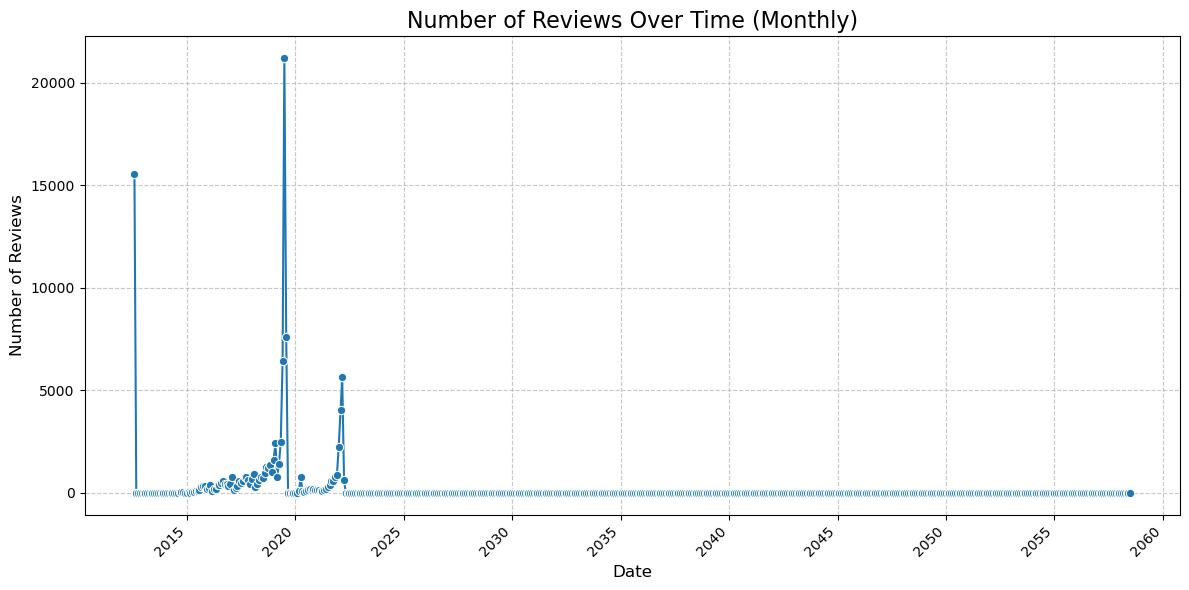

In [138]:
# Set 'last review' as the index
df_time = df.set_index('last review')

# Resample the data to monthly frequency and count the number of reviews in each month
reviews_over_time = df_time['number of reviews'].resample('M').count()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=reviews_over_time.index, y=reviews_over_time.values, marker='o')

# Add title and labels
plt.title('Number of Reviews Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability (optional)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()